### Цель EDA:
Выявить факторы влияющие на наличие расстройств сна

Вопросы:
1. Как определенный гендер влияет на наличие расстройств сна?
2. Как весовая категория влияет на наличие расстройств сна?
3. Как наличие расстройств сна влияет на качество и продолжительность сна?
4. Как возрастная категория влияет на наличие расстройств сна? 

### Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Загрузка данных

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', index_col = 'Person ID')

# Первичный осмотр данных

In [3]:
print("Размер данных:", df.shape)
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

Размер данных: (374, 12)
Количество строк: 374
Количество столбцов: 12


In [4]:
print("Первые 5 строк:")
df.head()

Первые 5 строк:


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
print("Последние 5 строк:")
df.tail()

Последние 5 строк:


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [6]:
print("Случайниые 10 строк:")
df.sample(10)

Случайниые 10 строк:


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
341,Female,55,Nurse,8.1,9,75,4,Overweight,140/95,72,5000,Sleep Apnea
25,Male,30,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
64,Male,32,Doctor,6.2,6,30,8,Normal,125/80,72,5000,NaN
157,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,NaN
290,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
256,Female,45,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia
56,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,NaN
172,Male,41,Lawyer,7.7,8,90,5,Normal,130/85,70,8000,NaN
165,Male,40,Lawyer,7.9,8,90,5,Normal,130/85,68,8000,NaN


In [7]:
print("Информация о данных:")
df.info()

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [8]:
print("Статистическое описание:")
df.describe()

Статистическое описание:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
print("Количество пропусков в данных:")
df.isna().sum()

Количество пропусков в данных:


Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

## Графики распределения изначальных данных:

### Графики распределения для числовых признаков: 

Числовых колонок: 7


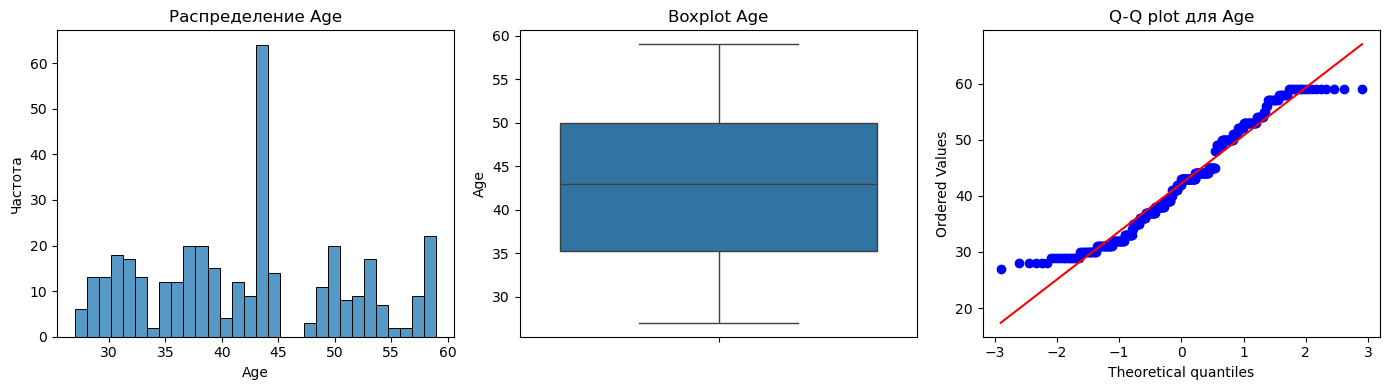

Статистики для 'Age':
  Медиана: 43.0
  Среднее: 42.18
  Стандартное отклонение: 8.67
  Минимальное значение: 27
  Максимальное значение: 59


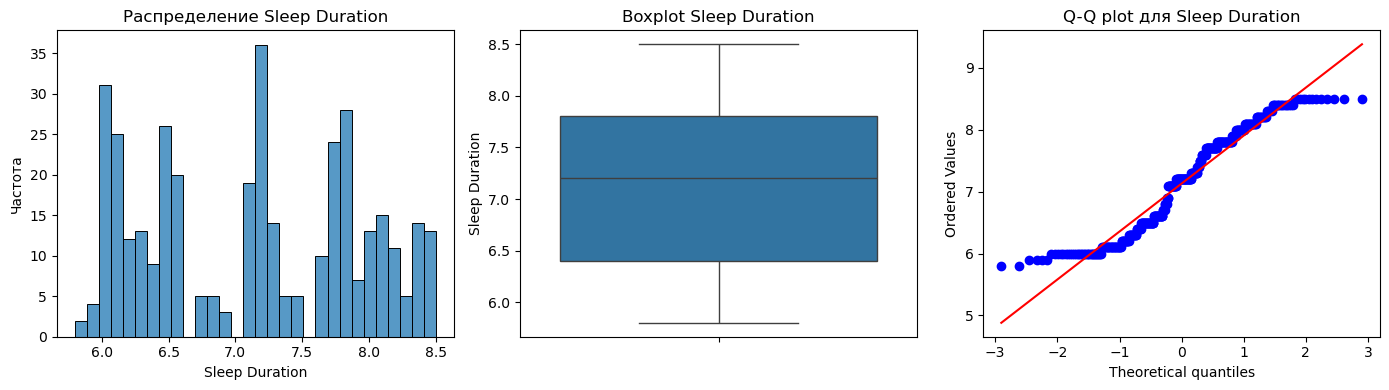

Статистики для 'Sleep Duration':
  Медиана: 7.2
  Среднее: 7.13
  Стандартное отклонение: 0.8
  Минимальное значение: 5.8
  Максимальное значение: 8.5


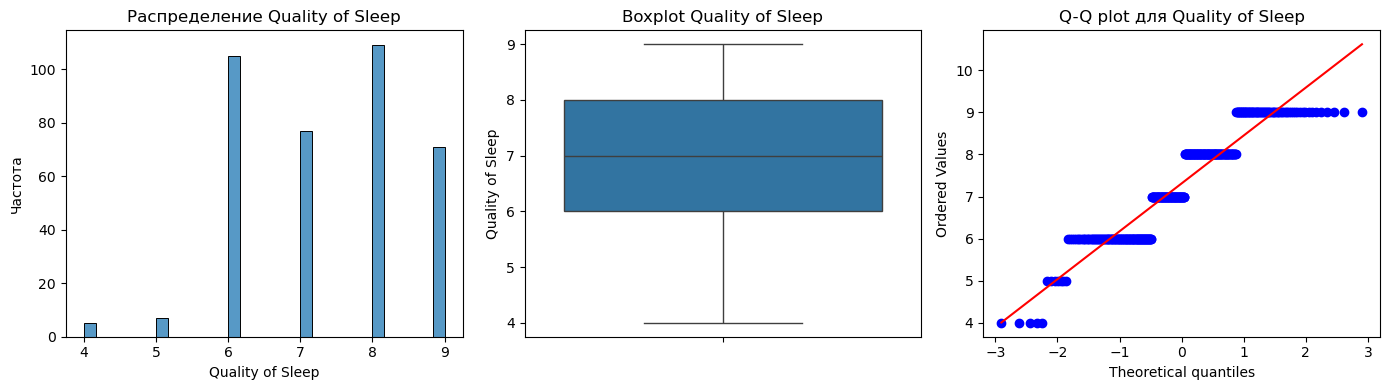

Статистики для 'Quality of Sleep':
  Медиана: 7.0
  Среднее: 7.31
  Стандартное отклонение: 1.2
  Минимальное значение: 4
  Максимальное значение: 9


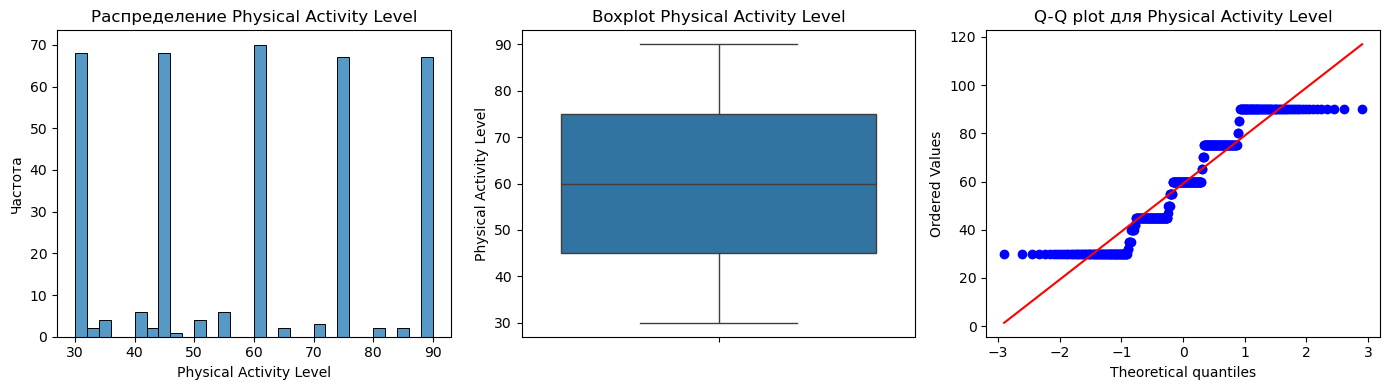

Статистики для 'Physical Activity Level':
  Медиана: 60.0
  Среднее: 59.17
  Стандартное отклонение: 20.83
  Минимальное значение: 30
  Максимальное значение: 90


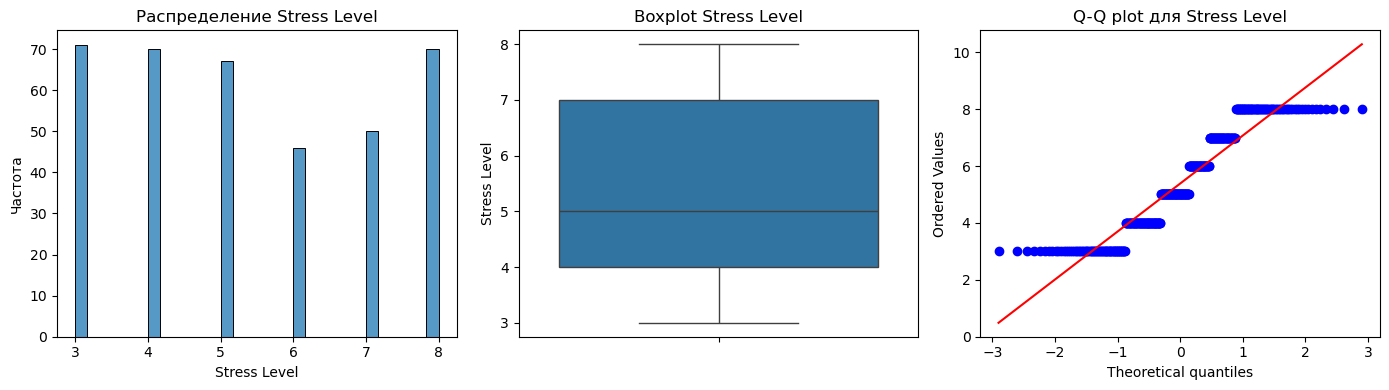

Статистики для 'Stress Level':
  Медиана: 5.0
  Среднее: 5.39
  Стандартное отклонение: 1.77
  Минимальное значение: 3
  Максимальное значение: 8


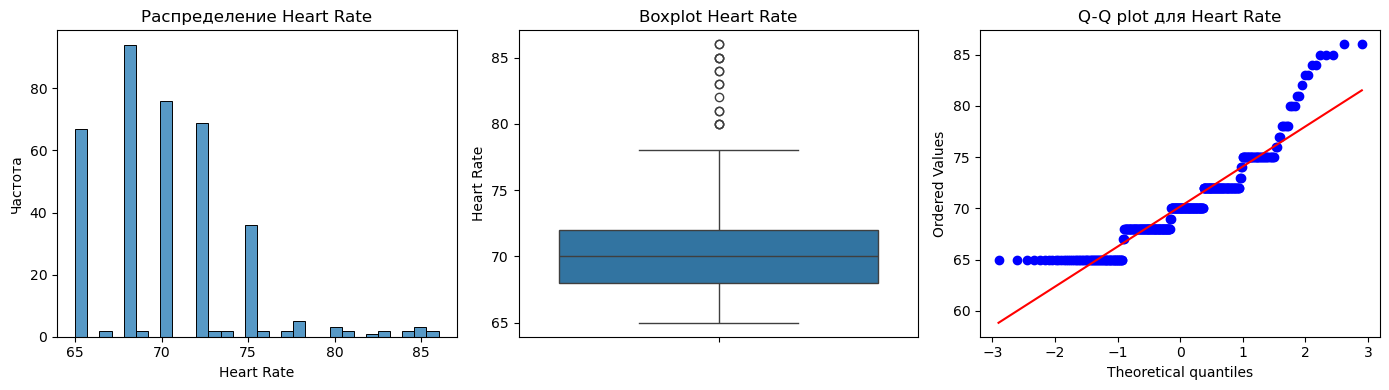

Статистики для 'Heart Rate':
  Медиана: 70.0
  Среднее: 70.17
  Стандартное отклонение: 4.14
  Минимальное значение: 65
  Максимальное значение: 86


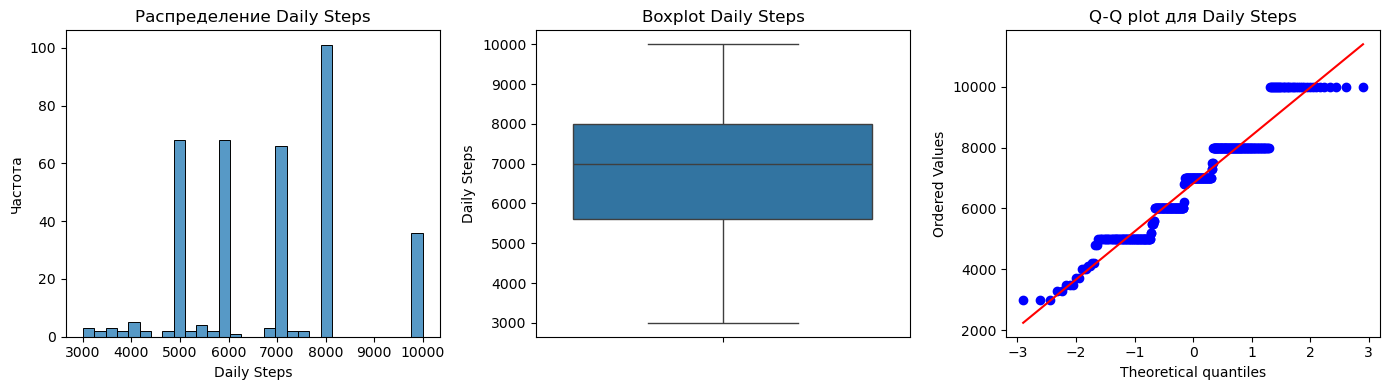

Статистики для 'Daily Steps':
  Медиана: 7000.0
  Среднее: 6816.84
  Стандартное отклонение: 1617.92
  Минимальное значение: 3000
  Максимальное значение: 10000


In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

print(f"Числовых колонок: {len(numeric_cols)}")

for col in numeric_cols:
    plt.figure(figsize=(14, 4))
    
    # Гистограмма
    plt.subplot(1, 3, 1)
    sns.histplot(df[col],bins=30)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
    
    # Q-Q plot для проверки нормальности
    plt.subplot(1, 3, 3)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot для {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Вывод статистик
    print(f"Статистики для '{col}':")
    print(f"  Медиана: {round(df[col].median(), 2)}")
    print(f"  Среднее: {round(df[col].mean(), 2)}")
    print(f"  Стандартное отклонение: {round(df[col].std(), 2)}")
    print(f"  Минимальное значение: {df[col].min()}")
    print(f"  Максимальное значение: {df[col].max()}")

In [11]:
print("Уникальные значения в категориальных столбцах:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"Колонка '{col}': {unique_count} уникальных значений")
    print(f"Значения: {df[col].unique()}")

Уникальные значения в категориальных столбцах:
Колонка 'Gender': 2 уникальных значений
Значения: ['Male' 'Female']
Колонка 'Occupation': 11 уникальных значений
Значения: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Колонка 'BMI Category': 4 уникальных значений
Значения: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Колонка 'Blood Pressure': 25 уникальных значений
Значения: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Колонка 'Sleep Disorder': 2 уникальных значений
Значения: [nan 'Sleep Apnea' 'Insomnia']


### Графики распределения для категориальных признаков: 

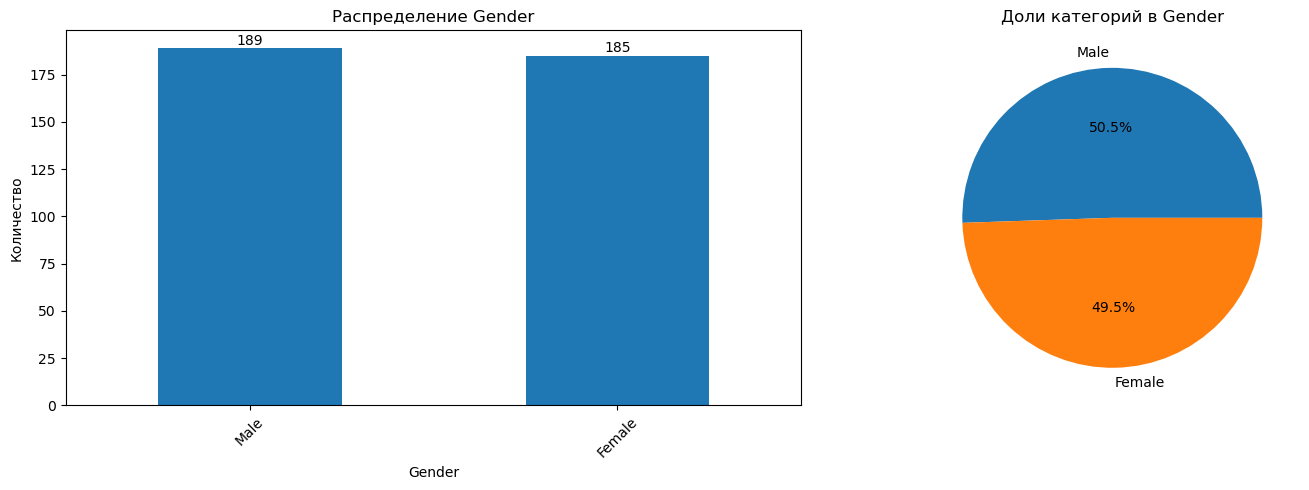

Статистики для 'Gender':
  Уникальных значений: 2
  Самая частая категория: 'Male' (189 записей)
  Доля самой частой категории: 50.5%


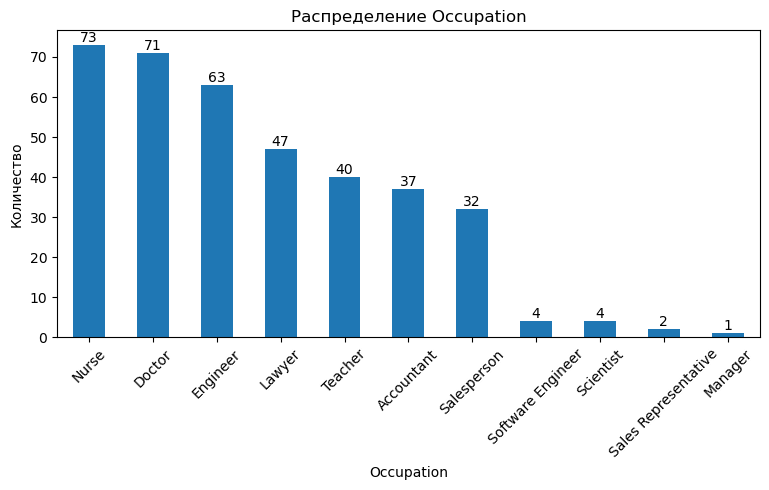

Статистики для 'Occupation':
  Уникальных значений: 11
  Самая частая категория: 'Nurse' (73 записей)
  Доля самой частой категории: 19.5%


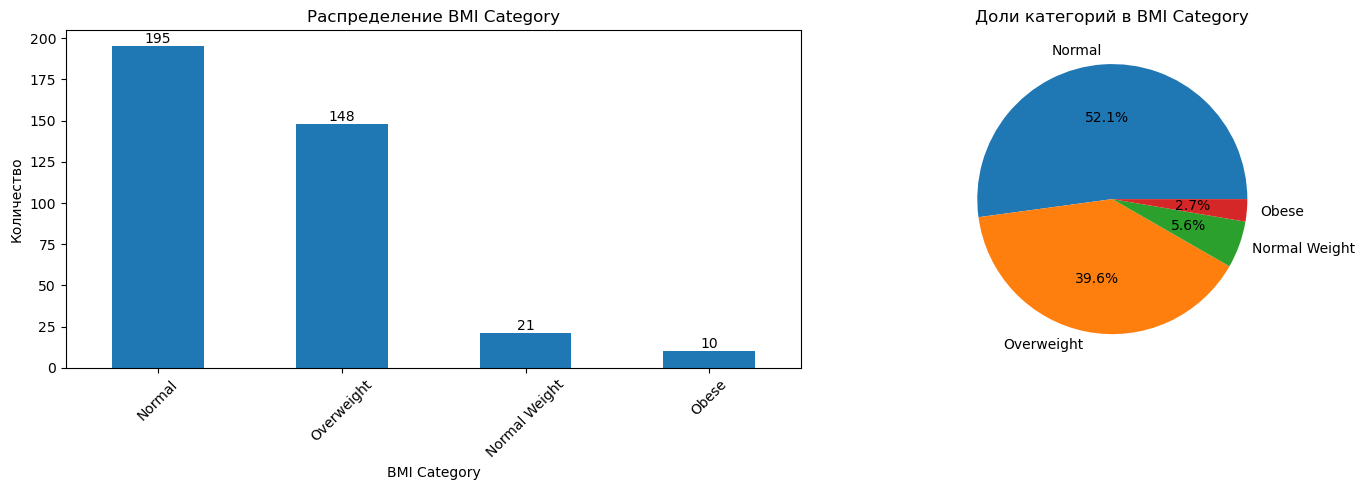

Статистики для 'BMI Category':
  Уникальных значений: 4
  Самая частая категория: 'Normal' (195 записей)
  Доля самой частой категории: 52.1%


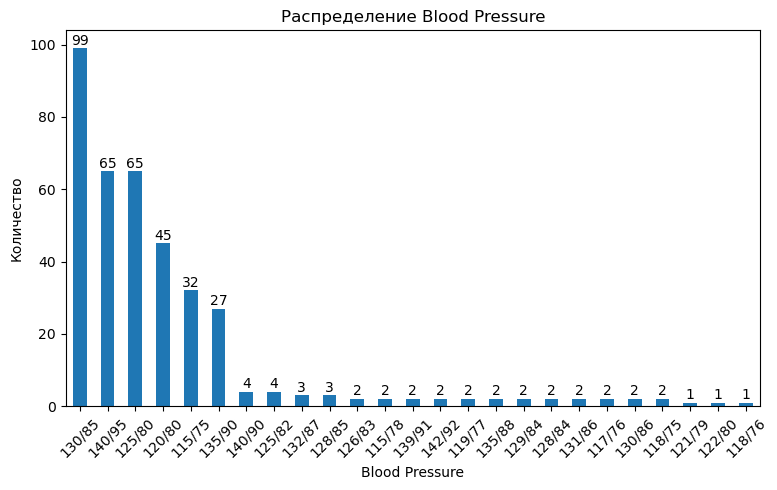

Статистики для 'Blood Pressure':
  Уникальных значений: 25
  Самая частая категория: '130/85' (99 записей)
  Доля самой частой категории: 26.5%


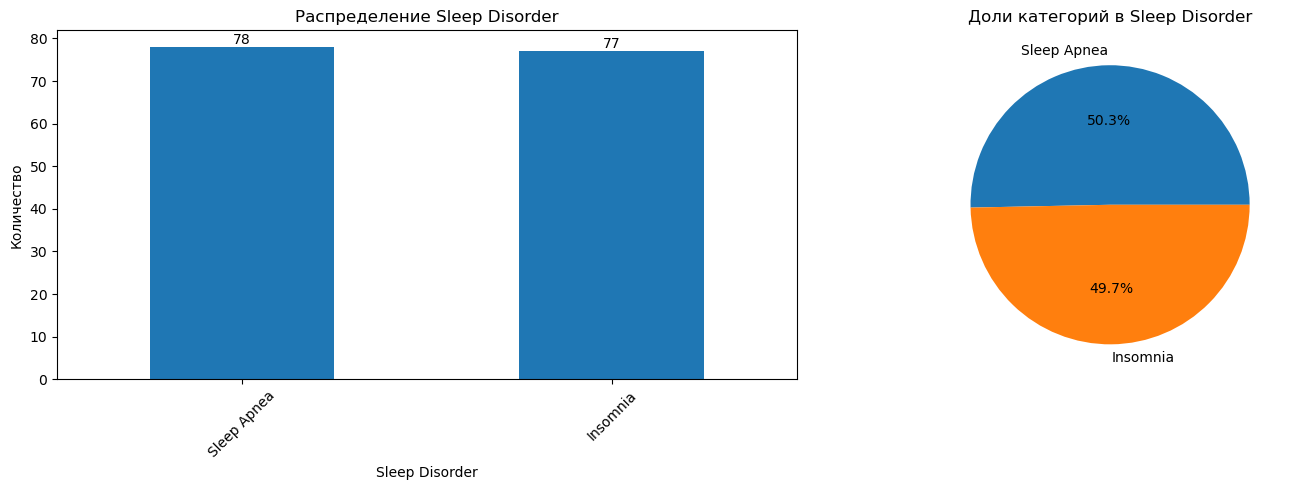

Статистики для 'Sleep Disorder':
  Уникальных значений: 2
  Самая частая категория: 'Sleep Apnea' (78 записей)
  Доля самой частой категории: 20.9%


In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(15, 5))
    
    # Столбчатая диаграмма
    plt.subplot(1, 2, 1)
    value_counts = df[col].value_counts()
    bars = value_counts.plot(kind='bar')
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    
    # Добавление значений на столбцы
    for i, v in enumerate(value_counts):
        plt.text(i, v + max(value_counts)*0.01, str(v), ha='center')
    
    # Круговая диаграмма 
    if len(value_counts) <= 10:
        plt.subplot(1, 2, 2)
        value_counts.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Доли категорий в {col}')
        plt.ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Статистики для '{col}':")
    print(f"  Уникальных значений: {df[col].nunique()}")
    print(f"  Самая частая категория: '{value_counts.index[0]}' ({value_counts.iloc[0]} записей)")
    print(f"  Доля самой частой категории: {(value_counts.iloc[0] / len(df) * 100):.1f}%")

In [13]:
print("Количество полных дубликатов:")
df.duplicated().sum()

Количество полных дубликатов:


242

## Обработка пропусков

In [14]:
print("Количество пропусков в данных до обработки:")
df.isna().sum()

Количество пропусков в данных до обработки:


Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [15]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

#### Заполнение пропусков в 'Sleep Disorder'

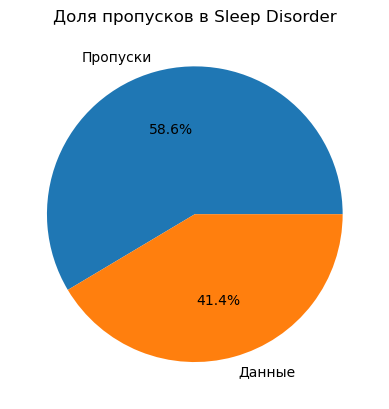

In [16]:
nan_in_sleep_disorder = df['Sleep Disorder'].isna().sum()
not_nan = len(df['Sleep Disorder']) - nan_in_sleep_disorder

size = [nan_in_sleep_disorder, not_nan]
labels = ['Пропуски', 'Данные']

plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title(f'Доля пропусков в {'Sleep Disorder'}')
plt.show()

In [17]:
#Так как, вероятнее всего отсутствие информации о расстройствах сна = отсутствию расстройств, заполняем пропуски значением 'No disorders' ("Нет расстройств")
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No disorders')

In [18]:
df['Sleep Disorder'].unique()

array(['No disorders', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [19]:
print("Количество пропусков в данных после обработки:")
df.isna().sum()

Количество пропусков в данных после обработки:


Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

## Обработка категориальных признаков

In [20]:
print("Признаки до обработки категорий:")
display(df.columns)
print(f"Количество признаков: {df.shape[1]}")

Признаки до обработки категорий:


Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

Количество признаков: 12


In [21]:
df.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorders
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorders


#### Удаление лишней 'BMI Category'

In [22]:
df['BMI Category'].unique() #['Overweight', 'Normal', 'Obese', 'Normal Weight'] - 4 категории

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [23]:
#Из 4-х категорий делаем 3: Normal, Overweight, Obese
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal') 

In [24]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

#### Разделение категории ‘Blood Pressure’  на две отдельные категории ('Systolic_pressure' и 'Diastolic_pressure')

In [25]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [26]:
df[['Systolic_pressure','Diastolic_pressure']] = df['Blood Pressure'].str.split('/' ,expand=True).astype('int') 
#expand=True - преобразует в отдельные признаки, если будет false вернет списком

In [27]:
# Удаление первоначального столбца
df = df.drop('Blood Pressure', axis=1) 

#### Результат Обработки признаков:

In [28]:
print("Признаки после обработки категорий:")
display(df.columns)
print(f"Количество признаков: {df.shape[1]}")

Признаки после обработки категорий:


Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Systolic_pressure',
       'Diastolic_pressure'],
      dtype='object')

Количество признаков: 13


## Удаление дублей

In [29]:
print(f"Количество строк:{df.shape[0]}")
print(f"Количество полных дубликатов:{df.duplicated().sum()}")

Количество строк:374
Количество полных дубликатов:242


In [30]:
#Удаляем дубликаты, оставляем только первое вхождение
df = df.drop_duplicates(keep='first')

In [31]:
print(f"Количество строк после удаления дублей:{df.shape[0]}")
print(f"Количество полных дубликатов:{df.duplicated().sum()}")

Количество строк после удаления дублей:132
Количество полных дубликатов:0


## Графики распределения обработанных данных:

### Графики распределения для числовых признаков: 

Числовых колонок: 9


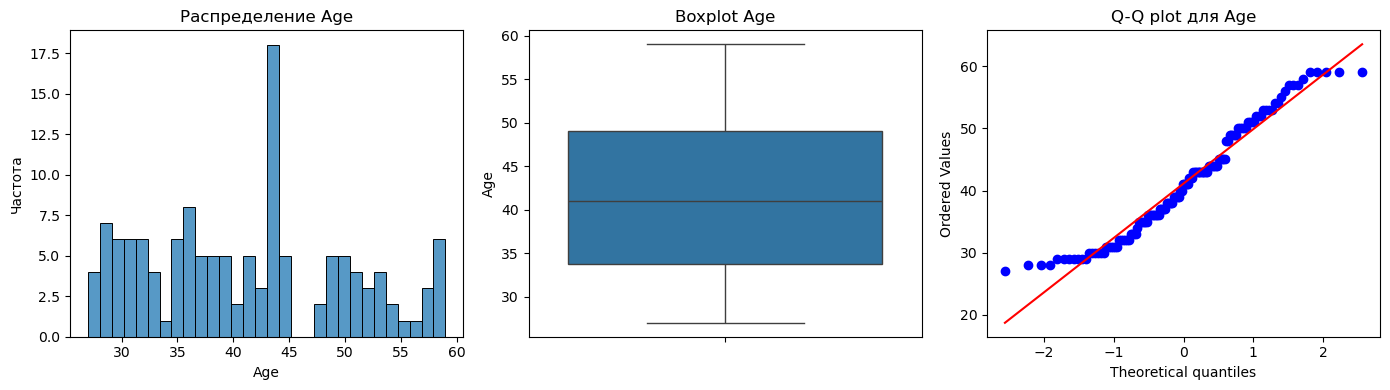

Статистики для 'Age':
  Медиана: 41.0
  Среднее: 41.13
  Стандартное отклонение: 8.81
  Минимальное значение: 27
  Максимальное значение: 59
  Выбросов: 0 (0.0%)
  Границы: [10.88, 71.88]


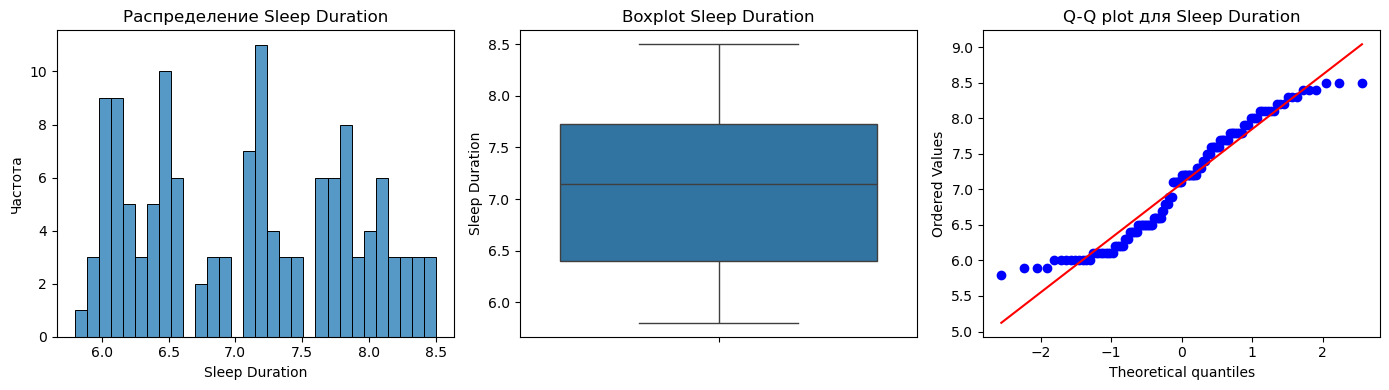

Статистики для 'Sleep Duration':
  Медиана: 7.15
  Среднее: 7.08
  Стандартное отклонение: 0.78
  Минимальное значение: 5.8
  Максимальное значение: 8.5
  Выбросов: 0 (0.0%)
  Границы: [4.41, 9.71]


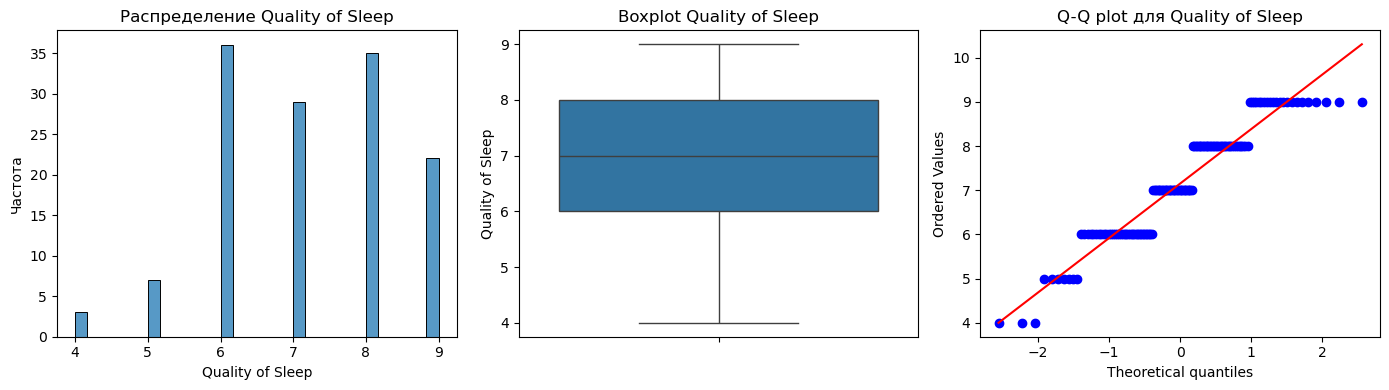

Статистики для 'Quality of Sleep':
  Медиана: 7.0
  Среднее: 7.15
  Стандартное отклонение: 1.27
  Минимальное значение: 4
  Максимальное значение: 9
  Выбросов: 0 (0.0%)
  Границы: [3.00, 11.00]


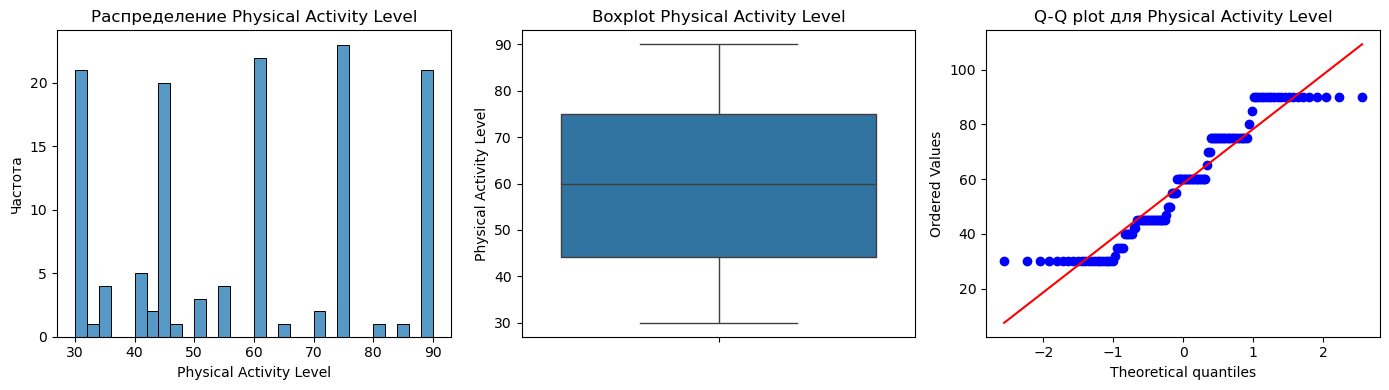

Статистики для 'Physical Activity Level':
  Медиана: 60.0
  Среднее: 58.39
  Стандартное отклонение: 20.47
  Минимальное значение: 30
  Максимальное значение: 90
  Выбросов: 0 (0.0%)
  Границы: [-1.88, 121.12]


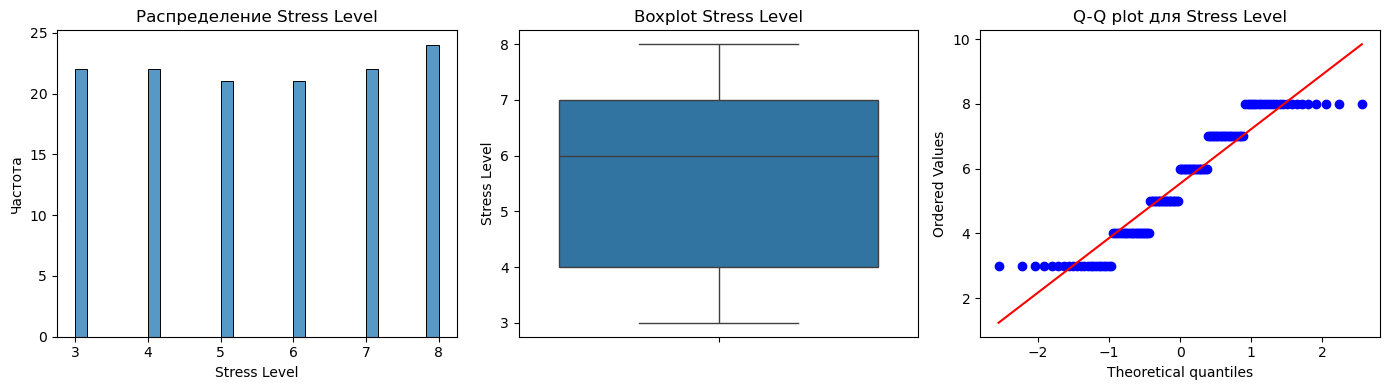

Статистики для 'Stress Level':
  Медиана: 6.0
  Среднее: 5.54
  Стандартное отклонение: 1.74
  Минимальное значение: 3
  Максимальное значение: 8
  Выбросов: 0 (0.0%)
  Границы: [-0.50, 11.50]


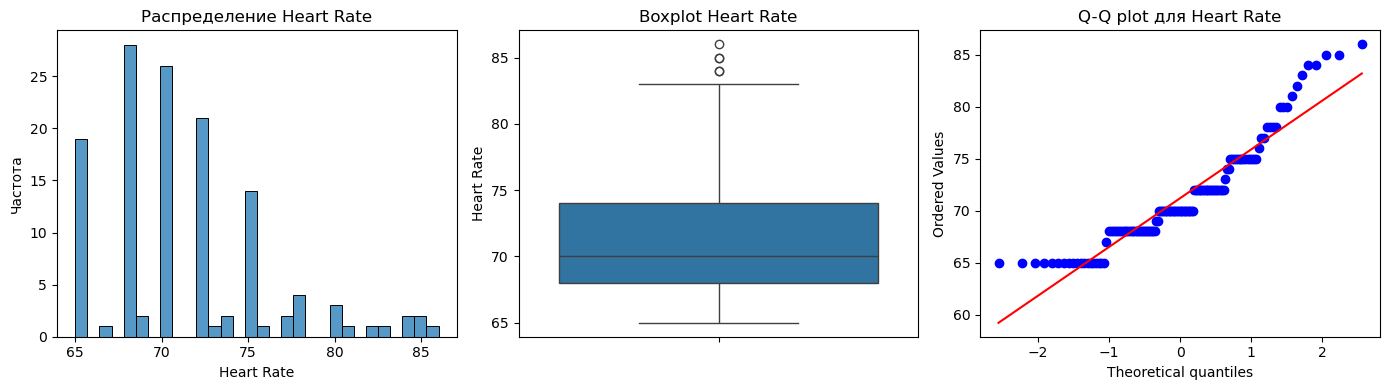

Статистики для 'Heart Rate':
  Медиана: 70.0
  Среднее: 71.2
  Стандартное отклонение: 4.87
  Минимальное значение: 65
  Максимальное значение: 86
  Выбросов: 5 (3.8%)
  Границы: [59.00, 83.00]


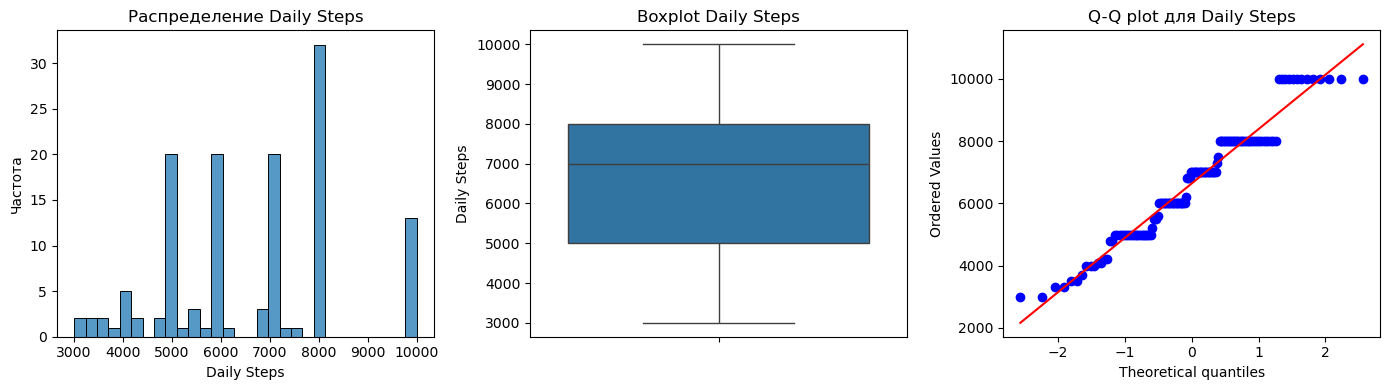

Статистики для 'Daily Steps':
  Медиана: 7000.0
  Среднее: 6637.88
  Стандартное отклонение: 1766.29
  Минимальное значение: 3000
  Максимальное значение: 10000
  Выбросов: 0 (0.0%)
  Границы: [500.00, 12500.00]


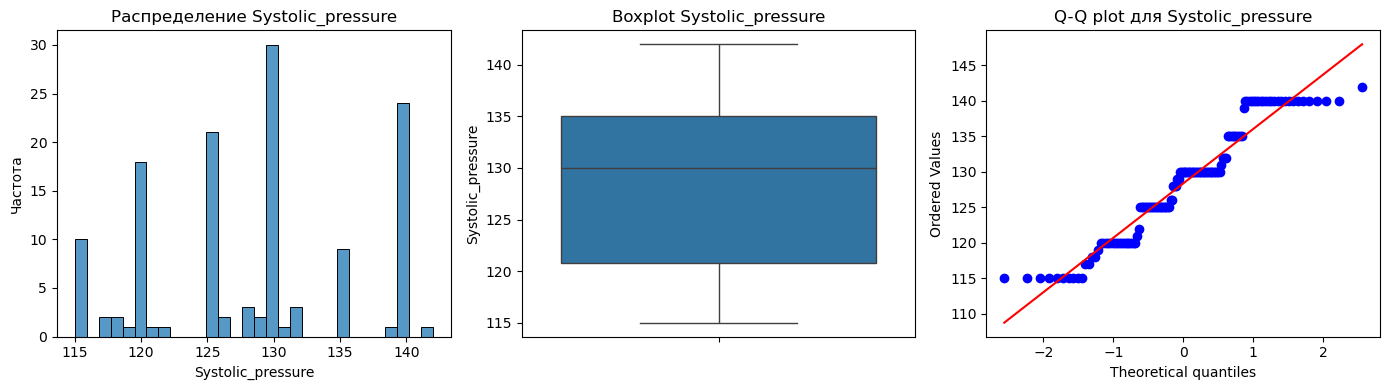

Статистики для 'Systolic_pressure':
  Медиана: 130.0
  Среднее: 128.36
  Стандартное отклонение: 7.83
  Минимальное значение: 115
  Максимальное значение: 142
  Выбросов: 0 (0.0%)
  Границы: [99.38, 156.38]


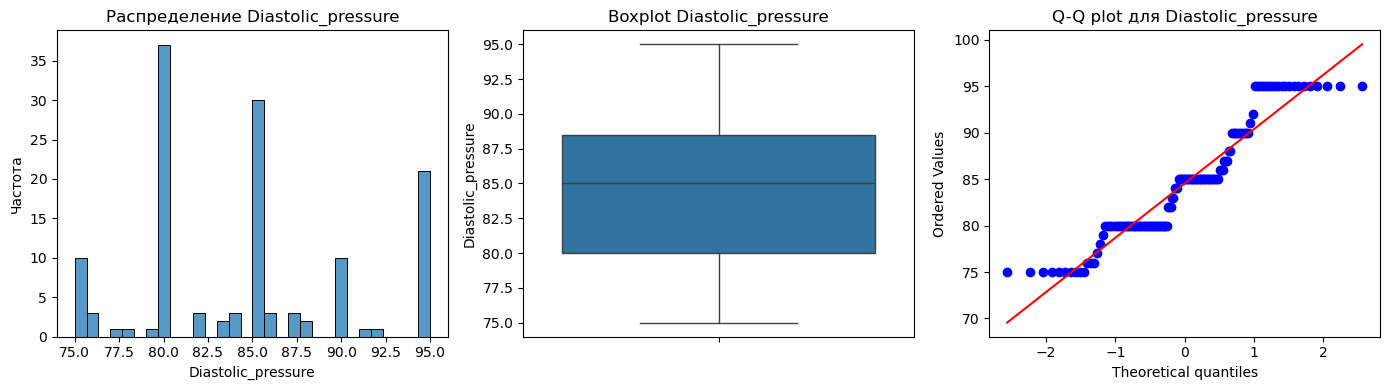

Статистики для 'Diastolic_pressure':
  Медиана: 85.0
  Среднее: 84.54
  Стандартное отклонение: 6.05
  Минимальное значение: 75
  Максимальное значение: 95
  Выбросов: 0 (0.0%)
  Границы: [67.25, 101.25]


In [32]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

print(f"Числовых колонок: {len(numeric_cols)}")

for col in numeric_cols:
    plt.figure(figsize=(14, 4))
    
    # Гистограмма
    plt.subplot(1, 3, 1)
    sns.histplot(df[col],bins=30)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    
    
    #Обнаружение выбросов
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
    
    # Q-Q plot для проверки нормальности
    plt.subplot(1, 3, 3)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot для {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Вывод статистик
    print(f"Статистики для '{col}':")
    print(f"  Медиана: {round(df[col].median(), 2)}")
    print(f"  Среднее: {round(df[col].mean(), 2)}")
    print(f"  Стандартное отклонение: {round(df[col].std(), 2)}")
    print(f"  Минимальное значение: {df[col].min()}")
    print(f"  Максимальное значение: {df[col].max()}")
    print(f"  Выбросов: {len(outliers)} ({outlier_percentage:.1f}%)")
    print(f"  Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")

### Графики распределения для категориальных признаков: 

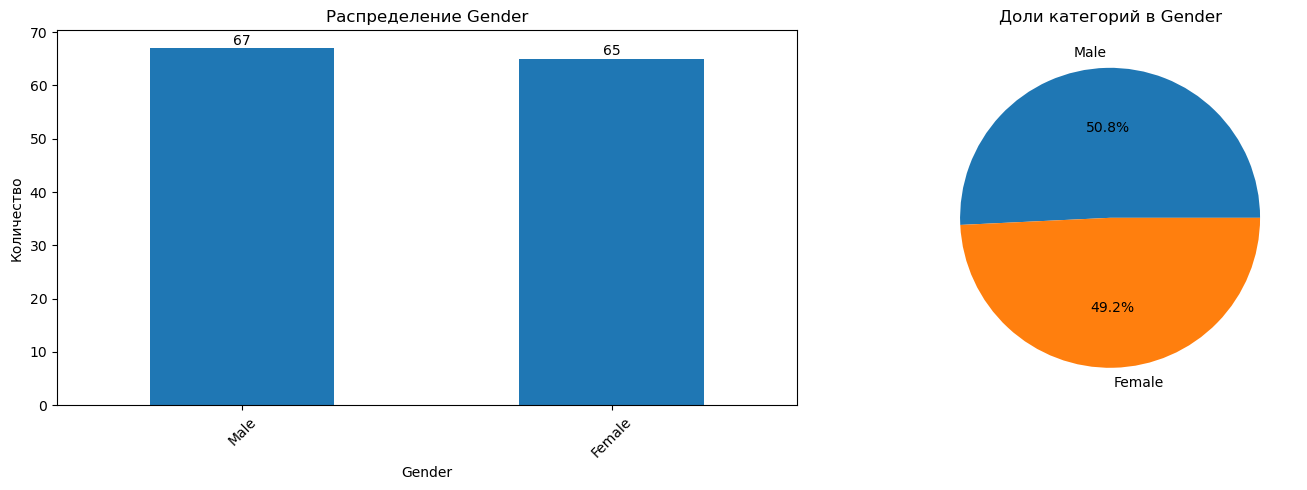

Статистики для 'Gender':
  Уникальных значений: 2
  Самая частая категория: 'Male' (67 записей)
  Доля самой частой категории: 50.8%


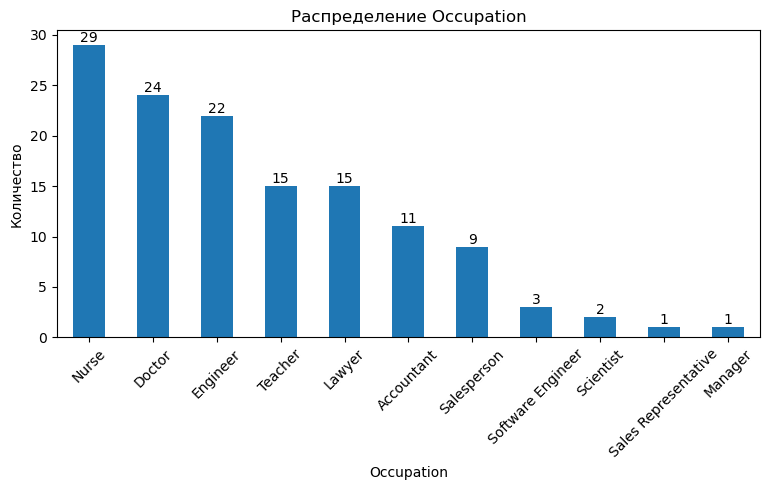

Статистики для 'Occupation':
  Уникальных значений: 11
  Самая частая категория: 'Nurse' (29 записей)
  Доля самой частой категории: 22.0%


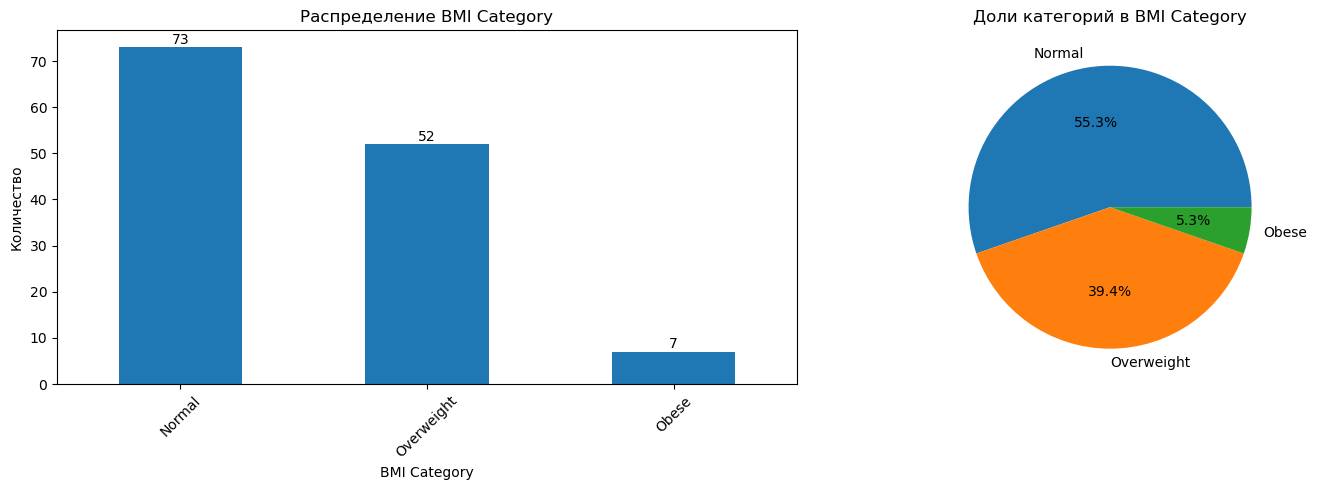

Статистики для 'BMI Category':
  Уникальных значений: 3
  Самая частая категория: 'Normal' (73 записей)
  Доля самой частой категории: 55.3%


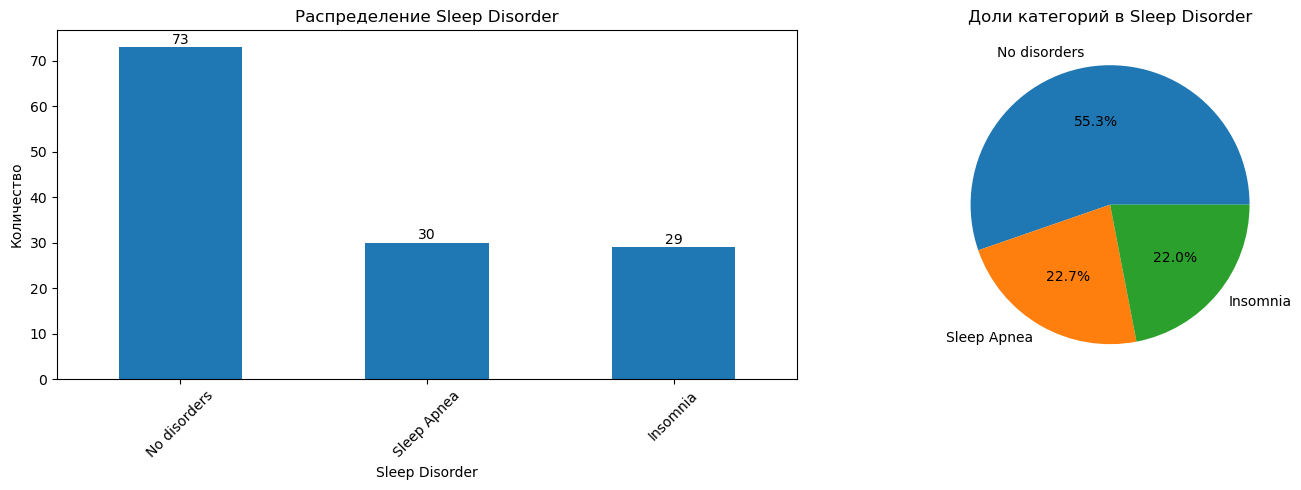

Статистики для 'Sleep Disorder':
  Уникальных значений: 3
  Самая частая категория: 'No disorders' (73 записей)
  Доля самой частой категории: 55.3%


In [33]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(15, 5))
    
    # Столбчатая диаграмма
    plt.subplot(1, 2, 1)
    value_counts = df[col].value_counts()
    bars = value_counts.plot(kind='bar')
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    
    # Добавление значений на столбцы
    for i, v in enumerate(value_counts):
        plt.text(i, v + max(value_counts)*0.01, str(v), ha='center')
    
    # Круговая диаграмма
    if len(value_counts) <= 10:
        plt.subplot(1, 2, 2)
        value_counts.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Доли категорий в {col}')
        plt.ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Статистики для '{col}':")
    print(f"  Уникальных значений: {df[col].nunique()}")
    print(f"  Самая частая категория: '{value_counts.index[0]}' ({value_counts.iloc[0]} записей)")
    print(f"  Доля самой частой категории: {(value_counts.iloc[0] / len(df) * 100):.1f}%")

In [34]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_pressure,Diastolic_pressure
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No disorders,126,83
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No disorders,125,80
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
6,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90
7,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90


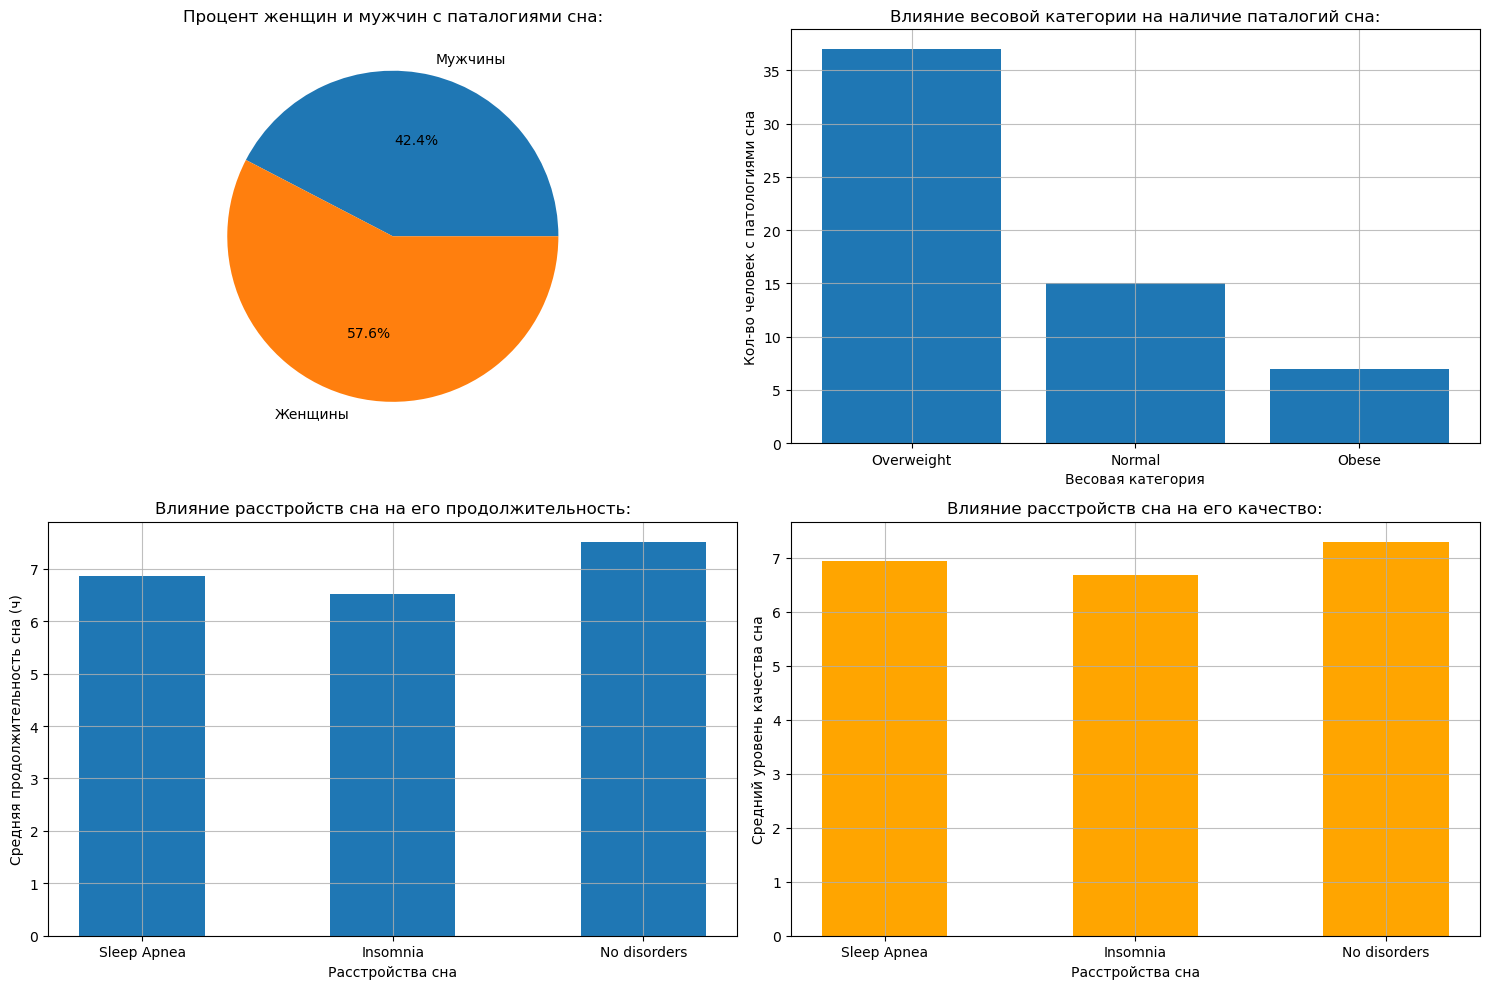

In [35]:
plt.figure(figsize=(15, 10))
           
#Влияние гендера на наличие патологий сна

men_with_sl_dis = (df['Sleep Disorder'] != 'No disorders') & (df['Gender'] == 'Male')
women_with_sl_dis = (df['Sleep Disorder'] != 'No disorders') & (df['Gender'] == 'Female')

number_of_men = len(df[men_with_sl_dis])
number_of_women = len(df[women_with_sl_dis])

size = [number_of_men, number_of_women]
labels = ['Мужчины', 'Женщины']

plt.subplot(2, 2, 1)
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('Процент женщин и мужчин с паталогиями сна:')


#Как весовая категория влияет на наличие расстройств сна?

plt.subplot(2, 2, 2)

people_with_sl_dis = df['Sleep Disorder'] != 'No disorders'

owerweight = people_with_sl_dis & (df['BMI Category'] == 'Overweight')
normal = people_with_sl_dis & (df['BMI Category'] == 'Normal')
obese = people_with_sl_dis & (df['BMI Category'] == 'Obese')

categories = ['Overweight', 'Normal', 'Obese']
count = [len(df[owerweight]), len(df[normal]), len(df[obese])]

plt.bar(categories, count)
plt.xlabel("Весовая категория")
plt.ylabel("Кол-во человек c патологиями сна")
plt.grid(alpha=0.8)
plt.title("Влияние весовой категории на наличие паталогий сна:")


#Как наличие расстройств сна влияет на качество и продолжительность сна?

people_with_apnea = df[df['Sleep Disorder'] == 'Sleep Apnea']
people_with_insomnia = df[df['Sleep Disorder'] == 'Insomnia']
people_without_disorders = df[df['Sleep Disorder'] == 'No disorders']

mean_qual_slp_with_apnea = round(people_with_apnea['Quality of Sleep'].mean(), 2)
mean_qual_slp_with_insomnia = round(people_with_insomnia['Quality of Sleep'].mean(), 2)
mean_qual_slp_without_disorders = round(people_without_disorders['Quality of Sleep'].mean(), 2)

mean_slp_dur_with_apnea = round(people_with_apnea['Sleep Duration'].mean(), 2)
mean_slp_dur_with_insomnia = round(people_with_insomnia['Sleep Duration'].mean(), 2)
mean_slp_dur_without_disorders = round(people_without_disorders['Sleep Duration'].mean(), 2)


categories = ['Sleep Apnea','Insomnia','No disorders']
means_sleep_qual = [mean_qual_slp_with_apnea, mean_qual_slp_with_insomnia, mean_qual_slp_without_disorders]
means_sleep_dur = [mean_slp_dur_with_apnea, mean_slp_dur_with_insomnia, mean_slp_dur_without_disorders]

width = 0.5

plt.subplot(2, 2, 3)
plt.bar(categories, means_sleep_qual, width)
plt.grid(alpha=0.8)
plt.xlabel('Расстройства сна')
plt.ylabel('Средняя продолжительность сна (ч)')
plt.title('Влияние расстройств сна на его продолжительность:')

plt.subplot(2, 2, 4)
plt.bar(categories, means_sleep_dur, width, color='orange')
plt.grid(alpha=0.8)
plt.xlabel('Расстройства сна')
plt.ylabel('Средний уровень качества сна')
plt.title('Влияние расстройств сна на его качество:')


plt.tight_layout()
plt.show()

In [36]:
print('Результаты:')
print('-------------------------------------------------------------')
print(f'Кол-во мужчин с паталогиями сна: {number_of_men},\nКол-во женщин с паталогиями сна: {number_of_women}')
print('-------------------------------------------------------------')
print(f'Кол-во людей с ожирением и паталогиями сна: {len(df[obese])},\nКол-во людей с избыточным весом и паталогиями сна: {len(df[owerweight])},\nКол-во людей с нормальным весом и паталогиями сна: {len(df[normal])}')
print('-------------------------------------------------------------')
print(f'Средняя продолжительность сна при наличии апноэ: {mean_slp_dur_with_apnea},\nСредняя продолжительность сна при наличии бессонницы: {mean_slp_dur_with_insomnia},\nСредняя продолжительность сна при отсутствии расстройств: {mean_slp_dur_without_disorders}')
print('-------------------------------------------------------------')
print(f'Среднее качество сна при наличии апноэ: {mean_qual_slp_with_apnea},\nСреднее качество сна при наличии бессонницы: {mean_qual_slp_with_insomnia},\nСреднее качество сна при отсутствии расстройств: {mean_qual_slp_without_disorders}')
print('-------------------------------------------------------------')


Результаты:
-------------------------------------------------------------
Кол-во мужчин с паталогиями сна: 25,
Кол-во женщин с паталогиями сна: 34
-------------------------------------------------------------
Кол-во людей с ожирением и паталогиями сна: 7,
Кол-во людей с избыточным весом и паталогиями сна: 37,
Кол-во людей с нормальным весом и паталогиями сна: 15
-------------------------------------------------------------
Средняя продолжительность сна при наличии апноэ: 6.94,
Средняя продолжительность сна при наличии бессонницы: 6.68,
Средняя продолжительность сна при отсутствии расстройств: 7.3
-------------------------------------------------------------
Среднее качество сна при наличии апноэ: 6.87,
Среднее качество сна при наличии бессонницы: 6.52,
Среднее качество сна при отсутствии расстройств: 7.52
-------------------------------------------------------------


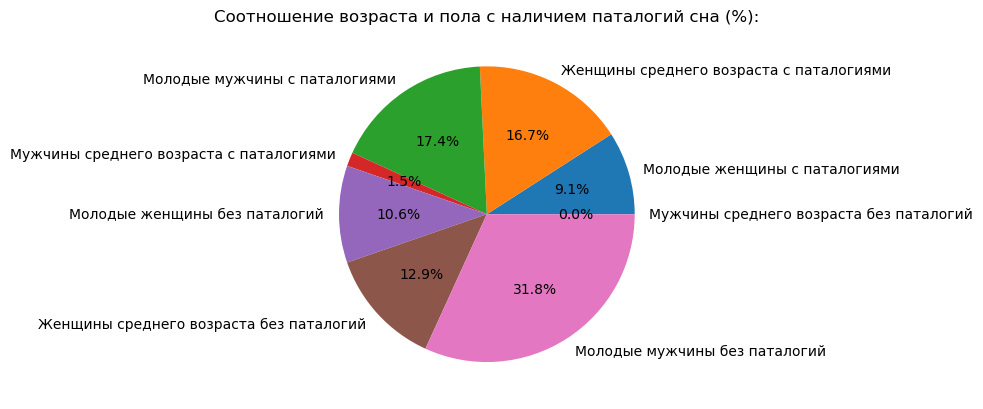

---------------------------------------------------------------------------------
Соотношение возраста и пола с наличием паталогий сна (категория: кол-во человек):
---------------------------------------------------------------------------------
* Молодые женщины c паталогиями: 12,
* Женщины среднего возраста c паталогиями: 22,

* Молодые мужчины c паталогиями: 23,
* Мужчины среднего возраста c паталогиями: 2,

* Молодые женщины без паталогий: 14,
* Женщины среднего возраста без паталогий: 17,

* Молодые мужчины без паталогий: 42,
* Мужчины среднего возраста без паталогий: 0


In [37]:
#Как возрастная категория влияет на наличие расстройств сна?

#Классификация Всемирной организации здравоохранения (ВОЗ): Молодой возраст: 18–44 года. Средний возраст: 45–59 лет.

young_women_with_disorder = len(df[(df['Age'] >= 18) & (df['Age'] <= 44) & (df['Gender'] == 'Female') & (df['Sleep Disorder'] != 'No disorders')])
young_women_without_disorder = len(df[(df['Age'] >= 18) & (df['Age'] <= 44) & (df['Gender'] == 'Female') & (df['Sleep Disorder'] == 'No disorders')])

middle_women_with_disorder = len(df[(df['Age'] >= 45) & (df['Age'] <= 59) & (df['Gender'] == 'Female') & (df['Sleep Disorder'] != 'No disorders')])
middle_women_without_disorder = len(df[(df['Age'] >= 45) & (df['Age'] <= 59) & (df['Gender'] == 'Female') & (df['Sleep Disorder'] == 'No disorders')])

young_men_with_disorder = len(df[(df['Age'] >= 18) & (df['Age'] <= 44) & (df['Gender'] == 'Male') & (df['Sleep Disorder'] != 'No disorders')])
young_men_without_disorder = len(df[(df['Age'] >= 18) & (df['Age'] <= 44) & (df['Gender'] == 'Male') & (df['Sleep Disorder'] == 'No disorders')])

middle_men_with_disorder = len(df[(df['Age'] >= 45) & (df['Age'] <= 59) & (df['Gender'] == 'Male') & (df['Sleep Disorder'] != 'No disorders')])
middle_men_without_disorder = len(df[(df['Age'] >= 45) & (df['Age'] <= 59) & (df['Gender'] == 'Male') & (df['Sleep Disorder'] == 'No disorders')])


age_groups = ['Молодые женщины c паталогиями', 'Женщины среднего возраста c паталогиями', 'Молодые мужчины c паталогиями', 'Мужчины среднего возраста c паталогиями', 'Молодые женщины без паталогий', 'Женщины среднего возраста без паталогий', 'Молодые мужчины без паталогий', 'Мужчины среднего возраста без паталогий']
count = [young_women_with_disorder, middle_women_with_disorder, young_men_with_disorder, middle_men_with_disorder, young_women_without_disorder, middle_women_without_disorder, young_men_without_disorder, middle_men_without_disorder]

plt.pie(count, labels=age_groups, autopct='%1.1f%%')
plt.title('Соотношение возраста и пола с наличием паталогий сна (%):')
plt.show()

result = f'* Молодые женщины c паталогиями: {young_women_with_disorder},\n* Женщины среднего возраста c паталогиями: {middle_women_with_disorder},\n\n* Молодые мужчины c паталогиями: {young_men_with_disorder},\n* Мужчины среднего возраста c паталогиями: {middle_men_with_disorder},\n\n* Молодые женщины без паталогий: {young_women_without_disorder},\n* Женщины среднего возраста без паталогий: {middle_women_without_disorder},\n\n* Молодые мужчины без паталогий: {young_men_without_disorder},\n* Мужчины среднего возраста без паталогий: {middle_men_without_disorder}'

print('---------------------------------------------------------------------------------')
print('Соотношение возраста и пола с наличием паталогий сна (категория: кол-во человек):')
print('---------------------------------------------------------------------------------')
print(result)

## Выводы из первичного EDA

### Качество данных:
1. **Пропуски:** В колонке 'Sleep Disorder', было обнаружено 58.6% пропусков. Все они были заполнены значением "No disorders" на основании предположения о том, что отсутствие данных говорит об отстутствии патологий сна.
2. **Дубликаты:** Было обнаружено 242 полных дубликата. Все они были удалены (за исключением первого вхождения).

### Выбросы:
1. **Колонка 'Heart Rate':** Обнаружено 3.8% выбросов

### Предварительные гипотезы:
+ **Гипотеза 1:** Гендер влияет на наличие паталогий сна
+ **Гипотеза 2:** Весовая категория влияет на наличие паталогий сна
+ **Гипотеза 3:** Наличие патологий сна влияет на качество и продожительность сна

In [38]:
basic_eda_df = df

In [39]:
basic_eda_df.to_csv('basic_eda_dataframe.csv', index=False, sep=';')